In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

#### Read Train Data

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [3]:
vdf = df_train.var()

In [4]:
vdf.index

Index(['ID', 'y', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=370)

#### 1.If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [5]:
zero_variance_columns = []
for index in vdf.index:
    if(vdf[index] == 0.0):
        zero_variance_columns.append(index)
print(zero_variance_columns)

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [6]:
final_df_train = df_train.drop(columns = zero_variance_columns, axis=1)
final_df_test = df_test.drop(columns = zero_variance_columns, axis=1)

#### 2a. Find any null values in train and test data

In [7]:
final_df_train.isnull().values.any()

False

In [8]:
final_df_test.isnull().values.any()

False

#### 2b. Find unique values in test and train data

#### unique values in train data

In [9]:
unique_values_list_columns = final_df_train.columns

In [10]:
unique_val_train = []
for col in unique_values_list_columns[2:]:
    for item in final_df_train[col].unique():
        if item not in unique_val_train:
            unique_val_train.append(item)
print(unique_val_train)

['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x', 'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e', 'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc', 'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab', 'p', 'av', 'ae', 'ag', 'an', 'ah', 'ar', 0, 1]


#### unique values in test data

In [11]:
unique_values_list_columns_test = final_df_test.columns

In [12]:
unique_val_test = []
for col in unique_values_list_columns_test[2:]:
    for item in final_df_train[col].unique():
        if item not in unique_val_test:
            unique_val_test.append(item)
print(unique_val_test)

['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z', 'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q', 'ab', 'at', 'av', 'as', 'aq', 'ai', 'ak', 'ae', 'ag', 'ay', 'ac', 'ap', 'aw', 'ao', 'al', 'x', 'au', 'an', 'ah', 'am', 'af', 'ar', 'ad', 0, 1]


#### 3. Apply label encoder

In [13]:
label_encoder = preprocessing.LabelEncoder()

In [14]:
le_train = label_encoder.fit_transform(unique_val_train)

In [15]:
le_train

array([40, 28, 49, 14, 44, 52, 39, 37, 48, 43, 27, 35, 53, 54, 12, 13, 15,
       55, 46, 22, 18, 51,  8,  2, 34, 11, 33, 19, 32,  3, 30, 21, 38, 47,
       29, 26, 31, 50,  6, 23, 42, 41, 25, 17,  5, 36,  4, 45, 24,  7,  9,
       16, 10, 20,  0,  1])

In [16]:
le_test = label_encoder.fit_transform(unique_val_test)

In [17]:
le_test

array([46, 44, 47, 26, 42, 36, 43,  3, 27,  2, 29, 32, 50, 34, 39, 45, 40,
       38, 33, 49, 28, 30, 37, 35, 31, 41,  4, 21, 23, 20, 18, 11, 12,  7,
        9, 25,  5, 17, 24, 16, 13, 48, 22, 15, 10, 14,  8, 19,  6,  0,  1])

### Final Train Data with label encoder

In [18]:
for col in unique_values_list_columns[2:]:
    final_df_train[col] = label_encoder.fit_transform(final_df_train[col])
final_df_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,8,20,16,2,3,0,3,16,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,31,16,40,3,3,0,7,7,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,8,23,38,0,3,0,6,4,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,9,19,25,5,3,0,11,20,...,0,0,0,0,0,0,0,0,0,0


In [19]:
final_df_train.shape

(4209, 366)

#### Final Test Data with label encoder

In [20]:
for col in unique_values_list_columns[2:]:
    final_df_test[col] = label_encoder.fit_transform(final_df_test[col])
final_df_test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,6,9,17,5,3,1,9,4,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,42,1,8,3,3,1,9,24,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,47,23,17,5,3,1,3,22,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,7,23,17,0,3,1,2,16,0,...,0,0,1,0,0,0,0,0,0,0


#### Visualize the data

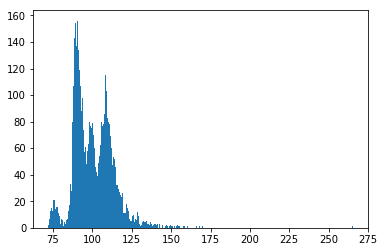

In [21]:
plt.hist(final_df_train.y, bins = 300)
plt.show()

In [22]:
# Only one outlier.
final_df_train[final_df_train.y >= 170]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
883,1770,265.32,45,19,7,5,3,6,11,19,...,0,0,0,0,0,0,0,0,0,0


### Final Test data with label encoder

In [23]:
for col in unique_values_list_columns[2:]:
    final_df_test[col] = label_encoder.fit_transform(final_df_test[col])
final_df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
# Drop the outlier
#final_df_train_y = final_df_train[final_df_train.y < 170]
final_df_train_y = final_df_train
# Remove y from dataframe
y = final_df_train_y.y
final_df_train_y = final_df_train_y.drop('y',1)

# Concatenate the training and testing dataframe
#fdf = pd.concat([final_df_train_y,final_df_test])
#fdf.y = fdf.y.fillna(fdf.y.mean())
fdf = final_df_train_y

In [25]:
# Find the categorical features, which will need to be converted into dummy features.
dummies = []
for column in fdf:
    if max(fdf[column]) != 1:
        print(column)
        dummies.append(column)
print(dummies)

ID
X0
X1
X2
X3
X4
X5
X6
X8
['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [26]:
# ID should be removed since it will not be used during training.
dummies = dummies[1:]

In [27]:
# Add dummy features, remove the original, and remove ID from the dataframe.
for feature in dummies:
    dummy_features = pd.get_dummies(fdf[feature], prefix=feature)
    for dummy in dummy_features:
        fdf[dummy] = dummy_features[dummy]
    fdf = fdf.drop([feature], 1)
fdf = fdf.drop(['ID'],1)

In [28]:
# Check the number of new features
fdf.shape

(4209, 551)

In [29]:
fdf.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_15,X8_16,X8_17,X8_18,X8_19,X8_20,X8_21,X8_22,X8_23,X8_24
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Split dataframe into training and testing sets
trainFinal = fdf[:len(final_df_train_y)]
testFinal = fdf[len(final_df_train_y):]
yFinal = pd.DataFrame(y)
yFinal

,y
0,130.81
1,88.53
2,76.26
3,80.62
4,78.02
...,...
4204,107.39
4205,108.77
4206,109.22
4207,87.48


#### 4. Perform dimensionality reduction. 

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler_df_train = scaler.fit(trainFinal)
scaler_df_train_data = scaler.transform(trainFinal)

scaler_df_test = scaler.fit(final_df_test)
scaler_df_test_data = scaler.transform(final_df_test)

#### Apply PCA Technique

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)
pca.fit(scaler_df_train_data)

pca_test = PCA(n_components=2)
pca_test.fit(scaler_df_test_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
x_pca = pca.transform(scaler_df_train_data)
x_pca_test = pca_test.transform(scaler_df_test_data)

In [36]:
scaler_df_train_data.shape

(4209, 551)

In [37]:
x_pca.shape

(4209, 2)

In [38]:
x_pca

array([[13.17849413, -2.70877101],
       [ 0.16618142,  0.46903798],
       [10.07965983, 23.1343836 ],
       ...,
       [ 0.10679349,  0.72977653],
       [-1.58642488,  0.718462  ],
       [-1.95404575, -1.16638986]])

In [39]:
np.array(yFinal.y)

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

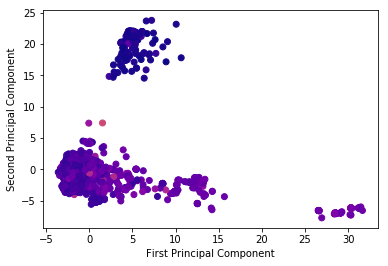

In [40]:
plt.scatter(x_pca[:,0], x_pca[:,1], c= yFinal.y, cmap="plasma")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

### 5. Predict your test_df values using XGBoost.

In [41]:
import xgboost as xgb

In [42]:
train = xgb.DMatrix(x_pca, label = yFinal)
train

In [43]:
test = xgb.DMatrix(x_pca_test, label = yFinal)
test

In [44]:
param = {
    'max_depth': 5,
    'eta': 0.3,
    'num_class': 1
}
epochs = 10

#### 5.Predict your test_df values using XGBoost.

In [45]:
model = xgb.train(param, train, epochs)

In [46]:
predictions = model.predict(test)

In [49]:
predictions

array([76.0265  , 91.625404, 76.0265  , ..., 94.95182 , 97.50465 ,
       95.33545 ], dtype=float32)